In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
df=pd.read_csv('D:/Anu/7th SEM/DS/archive1/creditcard.csv')
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018920B807F0>,
      dtype=object)

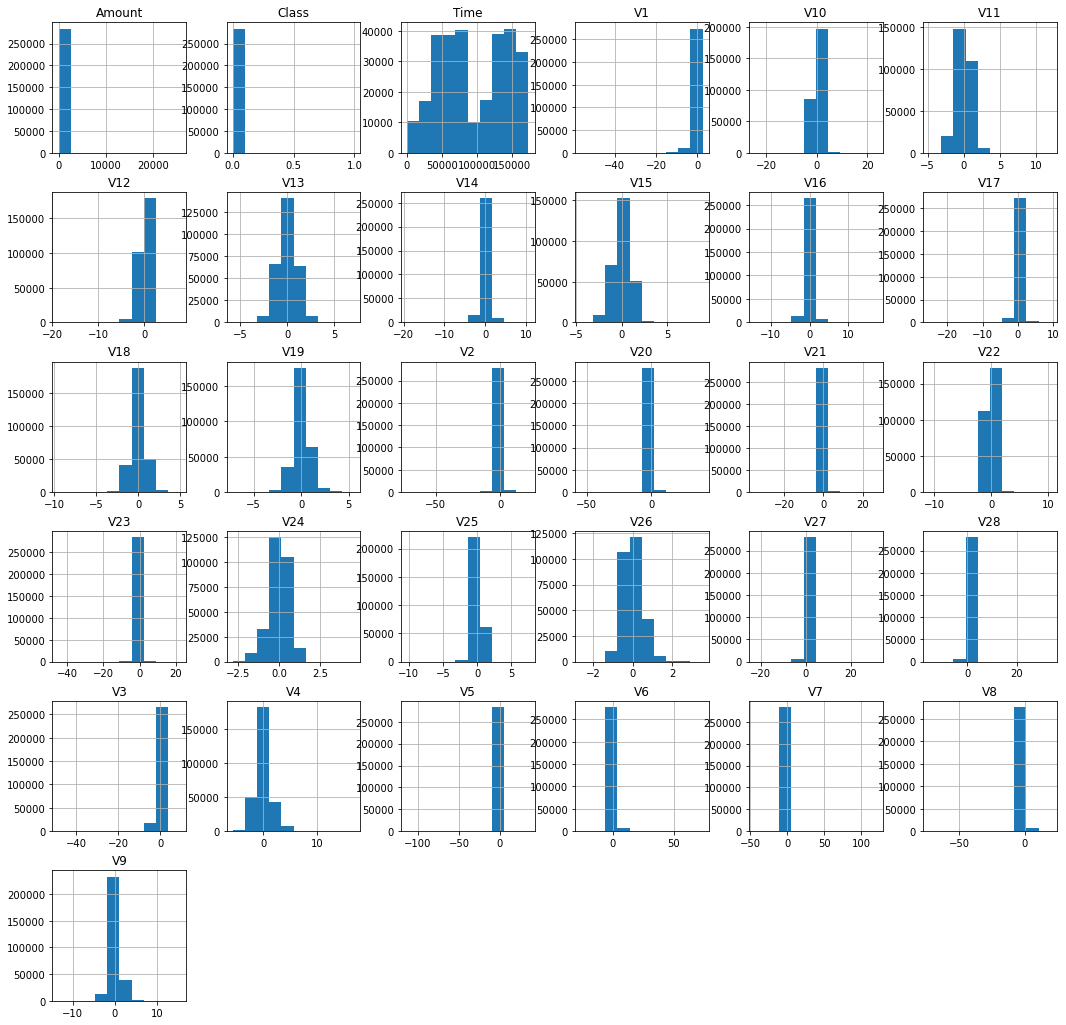

In [2]:
df.hist(figsize=[18,18])

In [3]:
df.fillna(df.median(),inplace=True)
df = df.drop_duplicates()

In [4]:
x=df[['Time','V1','V2','V3','V4','V5','V6','V7','V8','Amount']]
y = df['Class']
X_train,X_test,Y_train,Y_test = train_test_split(df,y,test_size=0.2)

In [5]:
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,Y_train)
accuracy_score(Y_test,knn.predict(X_test))

0.9985197194515913

In [6]:
min_max=MinMaxScaler()
X_train_minmax=min_max.fit_transform(X_train[['V1','V2','V3']])
X_test_minmax=min_max.fit_transform(X_test[['V1','V2','V3']])

In [9]:
del knn
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_minmax,Y_train)

KNeighborsClassifier()

In [10]:
accuracy_score(Y_test,knn.predict(X_test_minmax))


0.9986430761639586

In [11]:
X_train_scale = scale(X_train[['V1','V2','V3']])
X_test_scale = scale(X_test[['V1','V2','V3']])
log=LogisticRegression()
log.fit(X_train_scale,Y_train)
accuracy_score(Y_test,log.predict(X_test_scale))

0.9987135657138829

In [12]:
enc=OneHotEncoder(sparse=False)
X_train_1=X_train
X_test_1=X_test
columns=['Time','V9','V10','V14','V15','Amount']
for col in columns:
       # creating an exhaustive list of all possible categorical values
       data=X_train[[col]].append(X_test[[col]])
       enc.fit(data)
       # Fitting One Hot Encoding on train data
       temp = enc.transform(X_train[[col]])
       # Changing the encoded features into a data frame with new column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # In side by side concatenation index values should be same
       # Setting the index values similar to the X_train data frame
       temp=temp.set_index(X_train.index.values)
       # adding the new One Hot Encoded varibales to the train data frame
       X_train_1=pd.concat([X_train_1,temp],axis=1)
       # fitting One Hot Encoding on test data
       temp = enc.transform(X_test[[col]])
       # changing it into data frame and adding column names
       temp=pd.DataFrame(temp,columns=[(col+"_"+str(i)) for i in data[col]
            .value_counts().index])
       # Setting the index for proper concatenation
       temp=temp.set_index(X_test.index.values)
       # adding the new One Hot Encoded varibales to test data frame
       X_test_1=pd.concat([X_test_1,temp],axis=1)

MemoryError: Unable to allocate 211. GiB for an array with shape (226980, 124592) and data type float64

In [13]:
X_train_scale=scale(X_train_1)
X_test_scale=scale(X_test_1)
log.fit(X_train_scale,Y_train)
accuracy_score(Y_test,log.predict(X_test_scale))

1.0